In [42]:
import pandas as pd
pd.options.display.max_rows = 100

In [43]:
df = pd.read_csv(
    '/oak/stanford/groups/horence/rob/readzs_fork/results/timp3_counts.tsv',
    sep = '\t',
)
df.head()

,cell,chrom,pos,strand,read_count,lane,window,mouse
0,L8TX_181211_01_A01_GAGACTTCAATGGCCC,chr10,86345022,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003
1,L8TX_181211_01_A01_ACCTACCTCTGAACGT,chr10,86345707,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003
2,L8TX_181211_01_A01_ACATCGATCATGGCCG,chr10,86345741,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003
3,L8TX_181211_01_A01_CCTACGTCAAATGGCG,chr10,86345881,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003
4,L8TX_181211_01_A01_CTGTACCAGGCACGAT,chr10,86345922,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003


In [44]:
df.groupby('mouse')['cell'].nunique()

mouse
426003    2715
427378    2288
457909    1876
457911    1869
Name: cell, dtype: int64

In [66]:
df.groupby(['mouse','cell'])['read_count'].sum().reset_index()

,mouse,cell,read_count
0,426003,L8TX_181211_01_A01_AAAGGATTCTCTATAC,2
1,426003,L8TX_181211_01_A01_AAAGTCCCACTCCACT,22
2,426003,L8TX_181211_01_A01_AAATGGAGTTCGGCTG,1
3,426003,L8TX_181211_01_A01_AACAAGAAGAAATCCA,1
4,426003,L8TX_181211_01_A01_AACAAGAGTCGCTGCA,1
...,...,...,...
8743,457911,L8TX_190430_01_B08_TTTGATCAGGTGGGTT,1
8744,457911,L8TX_190430_01_B08_TTTGATCGTTTCGATG,2
8745,457911,L8TX_190430_01_B08_TTTGGAGAGGGACCAT,1
8746,457911,L8TX_190430_01_B08_TTTGGTTCACGGGCTT,2


In [61]:
df[df['read_count'].gt(2)]

,cell,chrom,pos,strand,read_count,lane,window,mouse,ontology
3796,L8TX_181211_01_G12_CCGTGAGAGGCATCTT,chr10,86349188,+,3,L8TX_181211_01_G12,chr10_17270_plus,426003,NaN
8345,L8TX_181211_01_B01_ATTATCCGTGCCGAAA,chr10,86349258,+,3,L8TX_181211_01_B01,chr10_17270_plus,427378,Sst
9673,L8TX_181211_01_E01_TCTCCGAAGAGGATCC,chr10,86349246,+,3,L8TX_181211_01_E01,chr10_17270_plus,427378,Sst
9784,L8TX_181211_01_E01_GACAGCCGTAGCGAGT,chr10,86349278,+,3,L8TX_181211_01_E01,chr10_17270_plus,427378,Sst
11611,L8TX_181211_01_C01_GATTCGAAGCTCTGTA,chr10,86349200,+,3,L8TX_181211_01_C01,chr10_17270_plus,427378,Sst
11627,L8TX_181211_01_C01_GTGTAACCAAGCTACT,chr10,86349202,+,3,L8TX_181211_01_C01,chr10_17270_plus,427378,Lamp5
20605,L8TX_190430_01_B08_AGACTCAGTAGTTACC,chr10,86349355,+,3,L8TX_190430_01_B08,chr10_17270_plus,457911,Sst


In [48]:
meta_df = pd.read_csv(
    '../../../readzs_fork/MOp_10Xv3_metadata.tsv',
    sep = '\t',
)
cell_id_to_ont = dict(meta_df[['cell_id','subclass_label']].values)

In [49]:
df['ontology'] = df['cell'].map(cell_id_to_ont)
df.head()

,cell,chrom,pos,strand,read_count,lane,window,mouse,ontology
0,L8TX_181211_01_A01_GAGACTTCAATGGCCC,chr10,86345022,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003,L5 IT
1,L8TX_181211_01_A01_ACCTACCTCTGAACGT,chr10,86345707,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003,NaN
2,L8TX_181211_01_A01_ACATCGATCATGGCCG,chr10,86345741,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003,NaN
3,L8TX_181211_01_A01_CCTACGTCAAATGGCG,chr10,86345881,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003,Sst
4,L8TX_181211_01_A01_CTGTACCAGGCACGAT,chr10,86345922,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003,Sst


In [50]:
df['ontology'].value_counts()

Sst           5369
Lamp5         1804
Vip           1033
L2/3 IT        888
L5 IT          885
Endo           803
Astro          720
L6 IT          525
L6 CT          360
OPC            236
Oligo          129
L5/6 NP         85
SMC             72
VLMC            40
Sncg            37
Pvalb           27
L6b             22
L5 ET           13
L6 IT Car3       2
Name: ontology, dtype: int64

In [67]:
agg_df = df.groupby(['ontology','mouse']).agg(
    num_cells = ('cell','nunique'),
    total_counts = ('read_count','sum'),
).reset_index()

agg_df['counts_per_cell'] = agg_df['total_counts']/agg_df['num_cells']

agg_df

,ontology,mouse,num_cells,total_counts,counts_per_cell
0,Astro,426003,94,332,3.531915
1,Astro,427378,68,156,2.294118
2,Astro,457909,41,89,2.170732
3,Astro,457911,65,155,2.384615
4,Endo,426003,63,436,6.920635
5,Endo,427378,18,64,3.555556
6,Endo,457909,27,126,4.666667
7,Endo,457911,31,197,6.354839
8,L2/3 IT,426003,200,300,1.500000
9,L2/3 IT,427378,230,332,1.443478


In [68]:
agg_df[agg_df['ontology'].isin(['L6 IT','Sst'])]

,ontology,mouse,num_cells,total_counts,counts_per_cell
26,L6 IT,426003,79,118,1.493671
27,L6 IT,427378,157,243,1.547771
28,L6 IT,457909,67,71,1.059701
29,L6 IT,457911,88,101,1.147727
55,Sst,426003,162,1511,9.327160
56,Sst,427378,194,1450,7.474227
57,Sst,457909,175,1179,6.737143
58,Sst,457911,187,1344,7.187166


In [69]:
df

,cell,chrom,pos,strand,read_count,lane,window,mouse,ontology
0,L8TX_181211_01_A01_GAGACTTCAATGGCCC,chr10,86345022,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003,L5 IT
1,L8TX_181211_01_A01_ACCTACCTCTGAACGT,chr10,86345707,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003,NaN
2,L8TX_181211_01_A01_ACATCGATCATGGCCG,chr10,86345741,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003,NaN
3,L8TX_181211_01_A01_CCTACGTCAAATGGCG,chr10,86345881,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003,Sst
4,L8TX_181211_01_A01_CTGTACCAGGCACGAT,chr10,86345922,+,1,L8TX_181211_01_A01,chr10_17270_plus,426003,Sst
...,...,...,...,...,...,...,...,...,...
20727,L8TX_190430_01_B08_GAGTTACTCTCCGTGT,chr10,86349413,+,1,L8TX_190430_01_B08,chr10_17270_plus,457911,VLMC
20728,L8TX_190430_01_B08_AAGCATCAGCAGTCTT,chr10,86349414,+,1,L8TX_190430_01_B08,chr10_17270_plus,457911,Sst
20729,L8TX_190430_01_B08_CCACACTTCGGTAAGG,chr10,86349414,+,1,L8TX_190430_01_B08,chr10_17270_plus,457911,Sst
20730,L8TX_190430_01_B08_GTTGAACCACGTTCGG,chr10,86349414,+,1,L8TX_190430_01_B08,chr10_17270_plus,457911,NaN


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

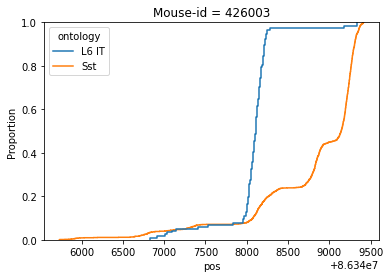

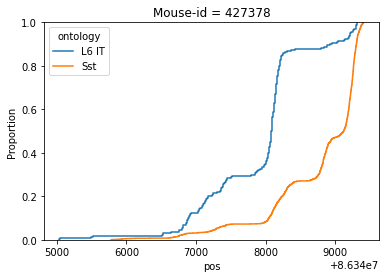

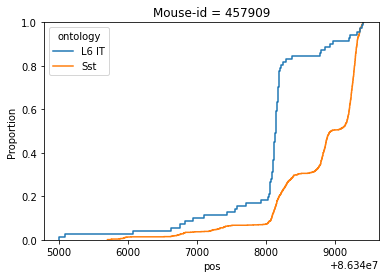

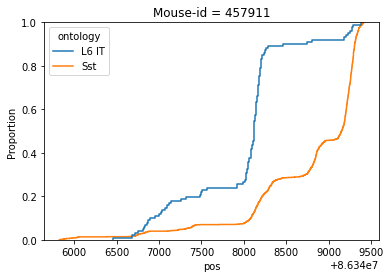

In [85]:
for mouse,mouse_df in df.groupby('mouse'):
    sns.ecdfplot(
        x = 'pos',
        hue = 'ontology',
        data = mouse_df[
            mouse_df['ontology'].isin(['Sst','L6 IT'])
        ],
        hue_order = ['L6 IT','Sst'],
    )
    plt.title('Mouse-id = {}'.format(mouse))
    plt.show()
    plt.close()